# Data@ANZ Virtual Internship

## Task 2: Predictive Analytics

For this task, you’ll likely need to use statistical software such as R, SAS, or Python.

Using the same transaction dataset, identify the annual salary for each customer

Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

In [1]:
# Importing Libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:

# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('dataset/ANZ.csv')
data.head()

,Unnamed: 0,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
data.columns

Index(['Unnamed: 0', 'status', 'card_present_flag', 'bpay_biller_code',
       'account', 'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [5]:
# selecting important featuers
data=data[["customer_id","age","txn_description","balance","amount"]]

In [6]:
data.head()

,customer_id,age,txn_description,balance,amount
0,CUS-2487424745,26,POS,35.39,16.25
1,CUS-2487424745,26,SALES-POS,21.20,14.19
2,CUS-2142601169,38,POS,5.71,6.42
3,CUS-1614226872,40,SALES-POS,2117.22,40.90
4,CUS-2487424745,26,SALES-POS,17.95,3.25


In [7]:
print(data['txn_description'].unique())

['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']


In [8]:
plot_data= data.groupby(["customer_id"]).mean().reset_index()
plot_data.head()

,customer_id,age,balance,amount
0,CUS-1005756958,53,2275.852055,222.862603
1,CUS-1117979751,21,9829.929000,339.843700
2,CUS-1140341822,28,5699.212250,212.632500
3,CUS-1147642491,34,9032.841186,245.600169
4,CUS-1196156254,34,22272.433755,147.145796


### Finding out the mean salary of each customer

In [9]:
salary=data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
salary=salary[["customer_id","amount"]]
salary=salary.rename(columns = {'amount':'salary'})

In [10]:
salary.head()

,customer_id,salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73


### Create some plots to analyze relation between existing data

In [11]:
plot_data=pd.merge(plot_data, salary, on="customer_id")
plot_data.head()

,customer_id,age,balance,amount,salary
0,CUS-1005756958,53,2275.852055,222.862603,970.47
1,CUS-1117979751,21,9829.929000,339.843700,3578.65
2,CUS-1140341822,28,5699.212250,212.632500,1916.51
3,CUS-1147642491,34,9032.841186,245.600169,1711.39
4,CUS-1196156254,34,22272.433755,147.145796,3903.73


### Salary v/s Age

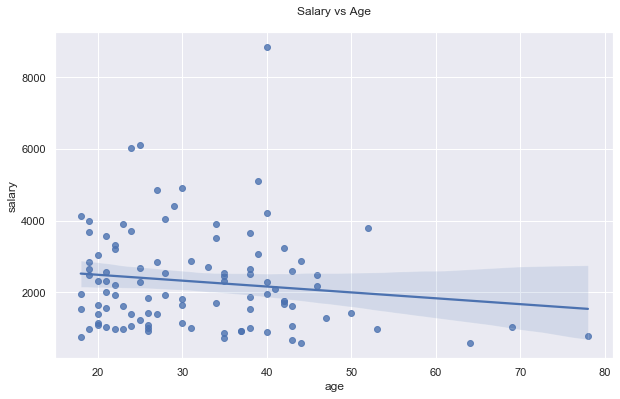

In [12]:
plt.figure(figsize=(10, 6))
sns.regplot("age", "salary", data=plot_data).set(title = "Salary vs Age\n")
plt.show()

### Salary v/s Account Balance

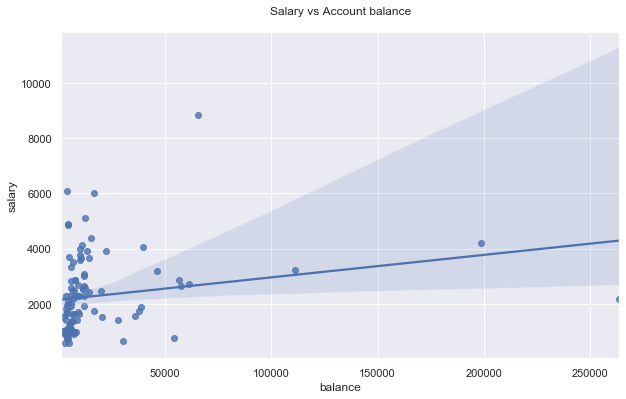

In [13]:
plt.figure(figsize=(10, 6))
sns.regplot("balance", "salary", fit_reg=True, data=plot_data).set(title = "Salary vs Account balance\n")
plt.show()

### Salary v/s Transaction Amount

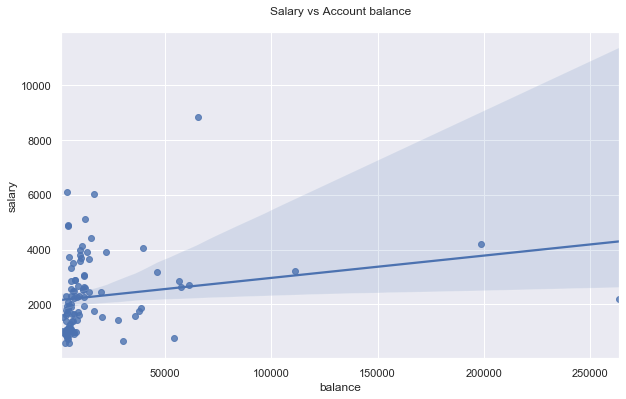

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot("balance", "salary", fit_reg=True, data=plot_data).set(title = "Salary vs Account balance\n")
plt.show()

In [15]:
# Mean POS (Point of Sale) for each customer
# POS indicates spending behavior of customer
pos=data[data["txn_description"]==("POS"or"SALES-POS")].groupby("customer_id").mean().reset_index()
pos=pos[["customer_id","amount"]]
pos=pos.rename(columns = {'amount':'pos'})
pos.head()

,customer_id,pos
0,CUS-1005756958,28.769615
1,CUS-1117979751,23.321923
2,CUS-1140341822,34.781282
3,CUS-1147642491,54.271316
4,CUS-1196156254,31.157432


In [16]:
# Mean payment made by the customer
payment=data[data["txn_description"]=="PAYMENT"].groupby("customer_id").mean().reset_index()
payment=payment[["customer_id","amount"]]
payment=payment.rename(columns = {'amount':'payment'})
payment.head()

,customer_id,payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000


In [17]:
# Mean Inter-bank transfer by each customer
interbank=data[data["txn_description"]=='INTER BANK'].groupby("customer_id").mean().reset_index()
interbank=interbank[["customer_id","amount"]]
interbank=interbank.rename(columns = {'amount':'interbank'})
interbank.head()

,customer_id,interbank
0,CUS-1117979751,1001.0000
1,CUS-1140341822,90.0000
2,CUS-1147642491,125.0000
3,CUS-1196156254,153.4000
4,CUS-1271030853,76.1875


In [18]:
# Mean phone transaction made by the customer
# Banking via phone/online pay
phonebank=data[data["txn_description"]=='PHONE BANK'].groupby("customer_id").mean().reset_index()
phonebank=phonebank[["customer_id","amount"]]
phonebank=phonebank.rename(columns = {'amount':'phonebank'})
phonebank.head()

,customer_id,phonebank
0,CUS-1005756958,182.0
1,CUS-1646183815,150.0
2,CUS-1896554896,1916.0
3,CUS-2155701614,82.0
4,CUS-2348881191,1629.0


## Merging relevant dataframes

In [19]:
customer=data.groupby("customer_id").mean().reset_index()
customer=customer[["customer_id","age","balance"]]
customer.head()

,customer_id,age,balance
0,CUS-1005756958,53,2275.852055
1,CUS-1117979751,21,9829.929000
2,CUS-1140341822,28,5699.212250
3,CUS-1147642491,34,9032.841186
4,CUS-1196156254,34,22272.433755


In [20]:
df=pd.merge(customer, payment, on="customer_id")
df=pd.merge(df, pos, on="customer_id")
df=pd.merge(df, salary, on="customer_id")

In [21]:
df.head()

,customer_id,age,balance,payment,pos,salary
0,CUS-1005756958,53,2275.852055,144.000000,28.769615,970.47
1,CUS-1117979751,21,9829.929000,98.925000,23.321923,3578.65
2,CUS-1140341822,28,5699.212250,142.000000,34.781282,1916.51
3,CUS-1147642491,34,9032.841186,96.185185,54.271316,1711.39
4,CUS-1196156254,34,22272.433755,43.100000,31.157432,3903.73


## Feature selection 

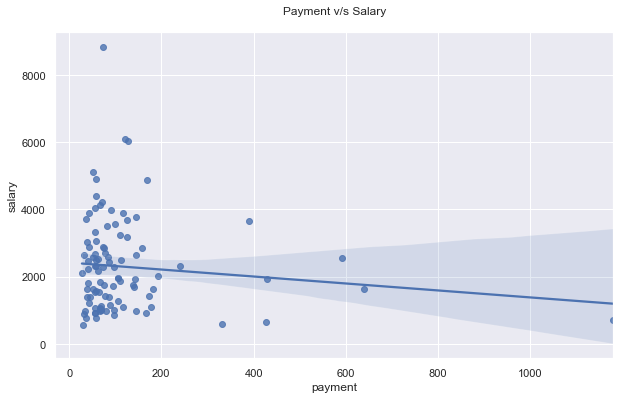

In [22]:
# Payment v/s Salary
plt.figure(figsize=(10, 6))
sns.regplot("payment", "salary", fit_reg=True, data=df).set(title = "Payment v/s Salary\n")
plt.show()

### Salary vs Point Of Sale

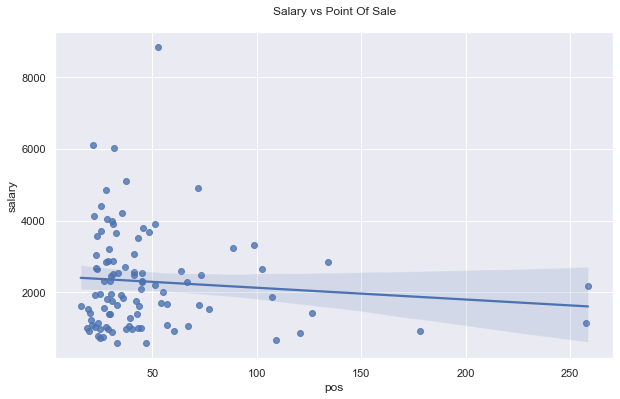

In [23]:
# Salary vs Point Of Sale
plt.figure(figsize=(10, 6))
sns.regplot("pos", "salary", fit_reg=True, data=df).set(title = "Salary vs Point Of Sale\n")
plt.show()

# Model building and predictive analytics

### Linear Regression Model

In [24]:
# # preparing data for training model
X = df[["age","balance","payment","pos"]].values
y = df["salary"].values

In [25]:
X.shape

(100, 4)

In [26]:
y.shape

(100,)

In [27]:
# splitting data into training set testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape

(80, 4)

In [29]:
y_train.shape

(80,)

In [30]:
X_test.shape

(20, 4)

In [31]:
y_test.shape

(20,)

In [32]:
# Training the simple linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# Interpreting Model Coefficients
print(linreg.intercept_)
print(linreg.coef_)

3154.534690478974
[-2.27770373e+01  1.22027639e-02 -7.78315370e-01 -6.07930272e+00]


In [34]:
# Making predictions with our model
y_pred = linreg.predict(X_test)
y_pred[:5]

array([1786.69647209, 2783.72451877, 2430.16351047, 2304.23562834,
       2147.46192293])

### Model Evaluation

In [35]:
from sklearn import metrics
print(f"Mean Absolute Error of our model is : {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error of our model is : {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error of our model is : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"Coefficient of determination: {metrics.r2_score(y_test, y_pred)}")

Mean Absolute Error of our model is : 1125.998916331192
Mean Squared Error of our model is : 2049359.207532709
Root Mean Squared Error of our model is : 1431.5583144017253
Coefficient of determination: 0.07666219584715894


In [36]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results.head(10)

,Actual,Predicted
0,1068.04,1786.696472
1,4054.77,2783.724519
2,983.36,2430.163510
3,1640.83,2304.235628
4,5103.51,2147.461923
5,1541.12,2378.074695
6,1098.91,2193.952265
7,1681.58,1789.922452
8,3785.78,1706.877987
9,970.47,1688.146784


## Decision Tree Regressor

In [37]:
# Training the Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [38]:
# Making predictions with our model
y_pred = dt.predict(X_test)
y_pred[:5]

array([1272.47, 2639.76, 3517.61, 2572.91, 3071.14])

In [39]:
from sklearn import metrics
print(f"Mean Absolute Error of our model is : {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error of our model is : {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error of our model is : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"Coefficient of determination: {metrics.r2_score(y_test, y_pred)}")

Mean Absolute Error of our model is : 1161.101
Mean Squared Error of our model is : 1821486.4557
Root Mean Squared Error of our model is : 1349.6245610168778
Coefficient of determination: 0.1793301544608129


In [40]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results.head(10)

,Actual,Predicted
0,1068.04,1272.47
1,4054.77,2639.76
2,983.36,3517.61
3,1640.83,2572.91
4,5103.51,3071.14
5,1541.12,3649.51
6,1098.91,2840.15
7,1681.58,917.45
8,3785.78,2280.36
9,970.47,1272.47
